In [1]:
import os
import cv2
import pandas as pd
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [2]:
output_path = "./RESULT/"
data_path = "./Dataset/"
if not os.path.isdir(output_path):
    os.mkdir(output_path)

In [3]:
backgrounds = [[data_path+"background0{}".format(el),"bg0{}".format(el)] for el in range(1,6)]
# background = backgrounds[0][0]
# bg = backgrounds[0][1]
# videos = [el for el in os.listdir(background) if ".avi" in el]
# video = videos[0]

# xmls = [el for el in os.listdir(background) if ".xml" in el]
# xml = xmls[0]

# im_path = os.path.join(background,video)

In [4]:
%%time
DF_l = []
for background_tup in backgrounds:
    print(background_tup)
    background = background_tup[0]
    bg = background_tup[1]
    
    xmls = [el for el in os.listdir(background) if ".xml" in el]
    for xml in xmls:
        xtree = et.parse(os.path.join(background,xml))
        xroot = xtree.getroot()

        xs, ys, idxs, names = [], [], [], []
        for node in xroot.iter('point'): 
            names.append(node.attrib["name"])
            xs.append(node.attrib["x"])
            ys.append(node.attrib["y"])
        for node in xroot.iter('frame'): 
            idxs.append(node.attrib["index"])
        # idxs = [x for item in idxs for x in repeat(item, 4)]
        idxs = [bg+"-"+xml.split(".gt")[0]+"-f"+idx+".jpg" for idx in idxs]

        temp_df = pd.DataFrame(list(zip(names,xs,ys)),columns=["names","xs","ys"])
        blx = temp_df[temp_df["names"]=="bl"]["xs"]
        bly = temp_df[temp_df["names"]=="bl"]["ys"]
        tlx = temp_df[temp_df["names"]=="tl"]["xs"]
        tly = temp_df[temp_df["names"]=="tl"]["ys"]
        
        brx = temp_df[temp_df["names"]=="br"]["xs"]
        bry = temp_df[temp_df["names"]=="br"]["ys"]
        trx = temp_df[temp_df["names"]=="tr"]["xs"]
        Try = temp_df[temp_df["names"]=="tr"]["ys"]
        
        df = pd.DataFrame(list(zip(idxs,blx,bly,tlx,tly,brx,bry,trx,Try)),
                          columns=["idxs","blx","bly","tlx","tly","brx","bry","trx","Try"])
        DF_l.append(df)


['./Dataset/background01', 'bg01']
['./Dataset/background02', 'bg02']
['./Dataset/background03', 'bg03']
['./Dataset/background04', 'bg04']
['./Dataset/background05', 'bg05']
CPU times: user 818 ms, sys: 6.64 ms, total: 824 ms
Wall time: 822 ms


In [5]:
sample_df = pd.concat(DF_l).sample(2000)

In [189]:
%%time
for background_tup in backgrounds[:]:
    print(background_tup)
    background = background_tup[0]
    bg = background_tup[1]

    videos = [el for el in os.listdir(background) if ".avi" in el]
    for video in videos:
        im_path = os.path.join(background,video)

        vidcap = cv2.VideoCapture(im_path)
        length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
        print( length )

        success,image = vidcap.read()
        count = 0
        while success:
            output_file = "{}-{}-f{}.jpg".format(bg, video.replace(".avi",""), count)    
            cv2.imwrite(os.path.join(output_path,output_file), image)     # save frame as JPEG file      
            success,image = vidcap.read()
    #         print('Read a new frame: ', success)
            count += 1

['./Dataset/background01', 'bg01']
209
194
187
235
163
205
201
192
235
211
210
227
193
199
201
197
223
188
200
223
205
206
242
206
200
200
201
204
211
212
['./Dataset/background02', 'bg02']
217
214
197
222
207
187
206
168
210
187
201
200
167
195
182
261
210
164
207
226
214
119
220
248
192
175
217
180
212
206
['./Dataset/background03', 'bg03']
164
192
199
215
208
195
185
179
209
176
184
221
199
230
196
185
189
211
224
183
195
238
204
201
189
188
201
203
192
197
['./Dataset/background04', 'bg04']
111
149
131
164
125
168
169
153
143
141
160
142
126
168
129
123
135
128
135
137
140
112
127
149
145
102
149
119
135
154
['./Dataset/background05', 'bg05']
77
99
92
97
87
80
92
87
83
84
94
82
85
84
88
78
80
91
85
81
79
78
78
88
97
83
100
73
85
90
CPU times: user 17min 47s, sys: 6.73 s, total: 17min 54s
Wall time: 16min 46s


[[399.916 831.267]
 [472.133 289.635]
 [878.282 816.357]
 [870.789 282.562]]
Image name: bg01-tax003-f76.jpg
Landmarks shape: (4, 2)
First 4 Landmarks: [[399.916 831.267]
 [472.133 289.635]
 [878.282 816.357]
 [870.789 282.562]]


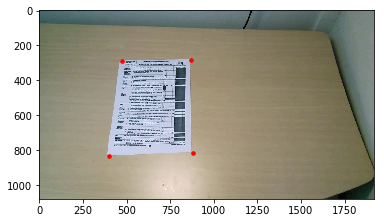

In [191]:
n = np.random.randint(2,200)
img_name = sample_df.iloc[n, 0]
landmarks = sample_df.iloc[n, 1:].values
landmarks = landmarks.astype('float').reshape(-1, 2)
print(landmarks)
print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=50, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(Image.open(os.path.join(output_path, img_name)),landmarks)
plt.show()

In [199]:
np.array(Image.open(os.path.join(output_path,"bg04-magazine004-f78.jpg"))).shape

(1080, 1920, 3)